<a href="https://colab.research.google.com/github/suvam23/Assignment-of-AI/blob/main/2462248_Suvam_Pant__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv("/content/drive/MyDrive/AI/melb_data.csv")

# Preview dataset
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Dataset size and data types
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (13580, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 no

In [18]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)


,0
Rooms,0
Distance,0
Bedroom2,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
Price,0


In [19]:
# Remove rows with missing target values
df = df.dropna(subset=['Price'])

# Selecting meaningful numerical features
selected_features = [
    'Rooms', 'Distance', 'Bedroom2',
    'Bathroom', 'Car', 'Landsize', 'BuildingArea'
]

df = df[selected_features + ['Price']]

# Filling remaining missing values using median
df = df.fillna(df.median())

df.head()


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,2,2.5,2.0,1.0,1.0,202.0,126.0,1480000.0
1,2,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0
2,3,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0
3,3,2.5,3.0,2.0,1.0,94.0,126.0,850000.0
4,4,2.5,3.0,1.0,2.0,120.0,142.0,1600000.0


In [6]:
# Task 3.2  EDA
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.611856,558.416127,139.633972,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.960793,3990.669241,392.217403,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,122.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,129.940000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,9.000000e+06


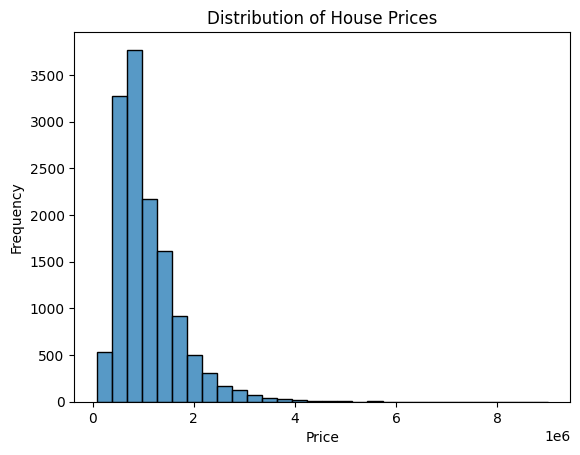

In [7]:
plt.figure()
sns.histplot(df['Price'], bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

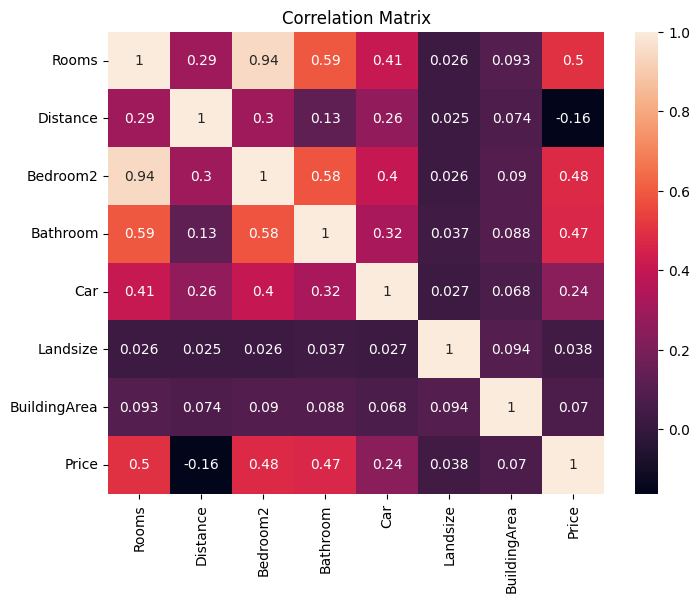

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [9]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mlp_r2 = r2_score(y_test, y_pred_mlp)

print("Neural Network RMSE:", mlp_rmse)
print("Neural Network R2:", mlp_r2)


Neural Network RMSE: 481532.60136956244
Neural Network R2: 0.41624985176741236


In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2:", lr_r2)


Linear Regression RMSE: 485224.2561231428
Linear Regression R2: 0.4072649371876962


In [38]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)


Random Forest RMSE: 373726.23823474796
Random Forest R2: 0.648372533533268


In [21]:
from sklearn.linear_model import LinearRegression

# Linear Regression model
lr = LinearRegression()

# Only tunable options for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# GridSearch with cross-validation
lr_grid = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring='r2'
)

# Fit using scaled data
lr_grid.fit(X_train_scaled, y_train)

# Best Linear Regression model
best_lr = lr_grid.best_estimator_

print("Best Linear Regression Parameters:", lr_grid.best_params_)
print("Best Linear Regression CV Score:", lr_grid.best_score_)


Best Linear Regression Parameters: {'fit_intercept': True, 'positive': False}
Best Linear Regression CV Score: 0.21817231329091635


In [45]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())


In [46]:

# Smaller parameter grid (faster)
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ),
    param_grid_rf,
    cv=5,
    scoring='r2',
    verbose=3
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV Score:", rf_grid.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.614 total time=   4.4s
[CV 2/5] END ..max_depth=None, n_estimators=100;, score=0.616 total time=   2.9s
[CV 3/5] END ..max_depth=None, n_estimators=100;, score=0.588 total time=   2.6s
[CV 4/5] END ..max_depth=None, n_estimators=100;, score=0.635 total time=   2.6s
[CV 5/5] END ..max_depth=None, n_estimators=100;, score=0.586 total time=   3.0s
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.604 total time=   2.5s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.615 total time=   2.1s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.591 total time=   1.4s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.630 total time=   1.4s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.584 total time=   1.4s
Best RF Params: {'max_depth': None, 'n_estimators': 100}
Best RF CV Score: 0.6076522291704785


In [47]:
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Select top 5 features
selected_features = feature_importance.head(5).index.tolist()

selected_features


['Distance', 'Rooms', 'Landsize', 'BuildingArea', 'Bathroom']

In [48]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)


In [49]:
best_lr.fit(X_train_sel_scaled, y_train)

lr_final_pred = best_lr.predict(X_test_sel_scaled)

lr_final_rmse = np.sqrt(mean_squared_error(y_test, lr_final_pred))
lr_final_r2 = r2_score(y_test, lr_final_pred)


In [50]:
best_rf.fit(X_train_sel, y_train)

rf_final_pred = best_rf.predict(X_test_sel)

rf_final_rmse = np.sqrt(mean_squared_error(y_test, rf_final_pred))
rf_final_r2 = r2_score(y_test, rf_final_pred)


In [55]:
final_table = pd.DataFrame({
    'Model': [
        'Neural Network (MLP)',
        'Linear Regression',
        'Random Forest Regressor'
    ],
    'Features Used': [
        f'Selected ({len(selected_features)})',
        f'Selected ({len(selected_features)})',
        f'Selected ({len(selected_features)})'
    ],
    'CV Score': [
        lr_grid.best_score_,
        rf_grid.best_score_,
        'N/A'  # Neural Network was not tuned using GridSearchCV
    ],
    'Test RMSE': [
        lr_final_rmse,
        rf_final_rmse,
        mlp_rmse
    ],
    'Test R-squared': [
        lr_final_r2,
        rf_final_r2,
        mlp_r2
    ]
})

final_table


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Neural Network (MLP),Selected (5),0.218172,490995.673343,0.393081
1,Linear Regression,Selected (5),0.607652,380209.242511,0.636067
2,Random Forest Regressor,Selected (5),N/A,481532.601370,0.416250
